In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf


In [5]:
start = '2015-10-20'
end = '2018-10-20'
df = yf.download('AAPL',start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-20,27.834999,28.542500,27.705000,28.442499,25.852318,195871200
2015-10-21,28.500000,28.895000,28.424999,28.440001,25.850050,167180800
2015-10-22,28.582500,28.875000,28.525000,28.875000,26.245432,166616400
2015-10-23,29.174999,29.807501,29.082500,29.770000,27.058929,237467600
2015-10-26,29.520000,29.532499,28.730000,28.820000,26.195446,265335200


In [6]:
df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-15,55.290001,55.457500,54.317501,54.340000,52.113533,123164000
2018-10-16,54.732498,55.747501,54.189999,55.537498,53.261955,116736000
2018-10-17,55.575001,55.660000,54.834999,55.297501,53.031792,91541600
2018-10-18,54.465000,54.935001,53.250000,54.005001,51.792252,130325200
2018-10-19,54.514999,55.314999,54.357498,54.827499,52.581055,132314800


In [8]:
df = df.reset_index() 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-20,27.834999,28.542500,27.705000,28.442499,25.852318,195871200
1,2015-10-21,28.500000,28.895000,28.424999,28.440001,25.850050,167180800
2,2015-10-22,28.582500,28.875000,28.525000,28.875000,26.245432,166616400
3,2015-10-23,29.174999,29.807501,29.082500,29.770000,27.058929,237467600
4,2015-10-26,29.520000,29.532499,28.730000,28.820000,26.195446,265335200


In [9]:
df = df.drop(['Date','Adj Close'], axis =1 )

In [10]:
df.head()

,Open,High,Low,Close,Volume
0,27.834999,28.542500,27.705000,28.442499,195871200
1,28.500000,28.895000,28.424999,28.440001,167180800
2,28.582500,28.875000,28.525000,28.875000,166616400
3,29.174999,29.807501,29.082500,29.770000,237467600
4,29.520000,29.532499,28.730000,28.820000,265335200


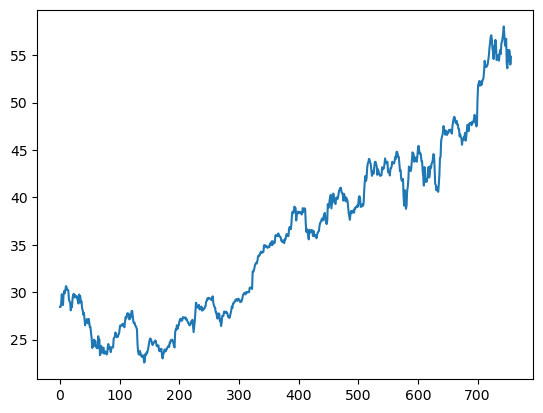

In [12]:
plt.plot(df.Close)